In [1]:
import tensorflow as tf
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

# 하이퍼파라미터 설정
batch_size = 32
epochs = 30
input_shape = (224, 224, 3)

data_path = '/content/drive/MyDrive/betta_images_aug_2'
classes = ['normal', 'tailrot']

train_path = os.path.join(data_path, 'train')
val_path = os.path.join(data_path, 'validation')
test_path = os.path.join(data_path, 'test')
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

Mounted at /content/drive


In [ ]:
import random

# 클래스별로 이미지 파일 리스트를 가져와서 분할
for class_name in classes:
    class_train_path = os.path.join(train_path, class_name)
    class_val_path = os.path.join(val_path, class_name)
    os.makedirs(class_val_path, exist_ok=True)
    
    # 이미지 파일 리스트 가져오기
    img_list = os.listdir(class_train_path)
    num_images = len(img_list)
    
    # 분할 비율 설정
    val_ratio = 0.2
    num_val = int(val_ratio * num_images)
    
    # 이미지 파일 리스트를 랜덤하게 섞음
    random.shuffle(img_list)
    
    # 분할된 이미지 파일을 validation 폴더로 이동
    for i in range(num_val):
        src_path = os.path.join(class_train_path, img_list[i])
        dst_path = os.path.join(class_val_path, img_list[i])
        shutil.move(src_path, dst_path)

In [2]:
data_path = '/content/drive/MyDrive/betta_images_aug_2'
train_path = os.path.join(data_path, 'train')
val_path = os.path.join(data_path, 'validation')
test_path = os.path.join(data_path, 'test')

In [3]:
# 데이터셋 전처리
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes,
    shuffle=False)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes,
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes,
    shuffle=False)

Found 1209 images belonging to 2 classes.
Found 301 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
# CNN 모델 생성
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 체크포인트 생성
checkpoint_path = '/content/drive/MyDrive/model_checkpoints_augment/weights_epoch_{epoch:02d}.h5'
checkpoint_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True)

# 모델 학습
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/30
31/31 [==============================] - 288s 9s/step - loss: 0.6058 - accuracy: 0.6942 - val_loss: 0.3625 - val_accuracy: 0.8672
Epoch 2/30
31/31 [==============================] - 149s 5s/step - loss: 0.2450 - accuracy: 0.9143 - val_loss: 0.1359 - val_accuracy: 0.9428
Epoch 3/30
31/31 [==============================] - 164s 5s/step - loss: 0.1147 - accuracy: 0.9597 - val_loss: 0.0723 - val_accuracy: 0.9742
Epoch 4/30
31/31 [==============================] - 166s 5s/step - loss: 0.0862 - accuracy: 0.9659 - val_loss: 0.0923 - val_accuracy: 0.9576
Epoch 5/30
31/31 [==============================] - 176s 6s/step - loss: 0.0475 - accuracy: 0.9835 - val_loss: 0.0948 - val_accuracy: 0.9649
Epoch 6/30
31/31 [==============================] - 168s 5s/step - loss: 0.0338 - accuracy: 0.9845 - val_loss: 0.0557 - val_accuracy: 0.9797
Epoch 7/30
31/31 [==============================] - 169s 5s/step - loss: 0.0257 - accuracy: 0.9897 - val_loss: 0.0617 - val_accuracy: 0.9815
Epoch 8/30
31

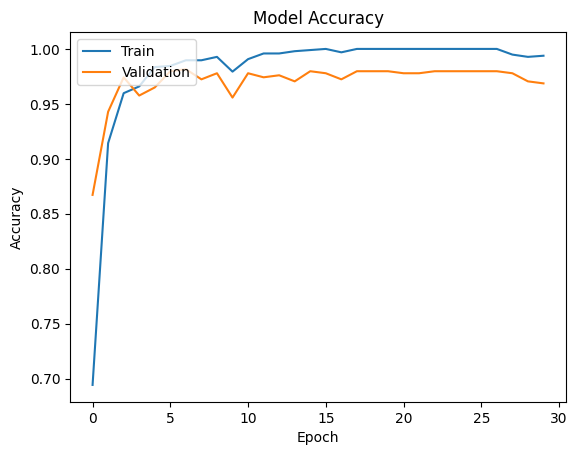

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7/7 [==============================] - 32s 5s/step - loss: 0.2638 - accuracy: 0.9300
Test Loss: 0.2638
Test Accuracy: 0.9300
7/7 [==============================] - 6s 780ms/step
Accuracy: 0.9300
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       100
           1       0.91      0.95      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix:
[[91  9]
 [ 5 95]]


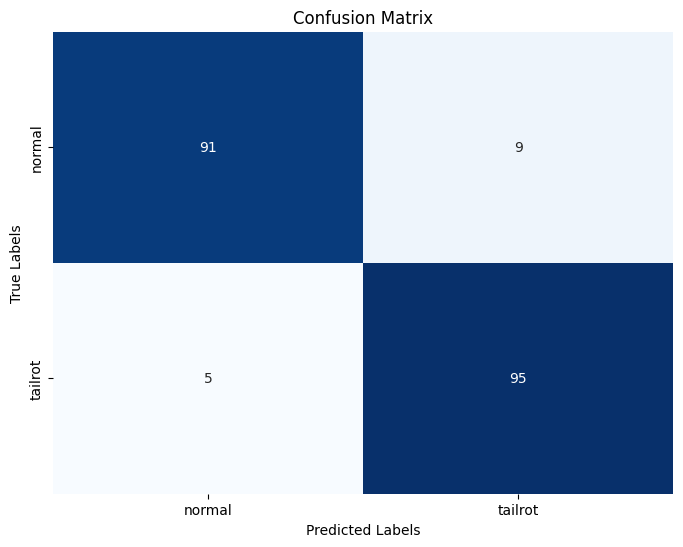

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 7번째 체크포인트
checkpoint_path = '/content/drive/MyDrive/model_checkpoints_augment/weights_epoch_07.h5'
model.load_weights(checkpoint_path)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# test set에 적용
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# test set 적용
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# accuracy, precision, recall, f1 score
accuracy = np.mean(y_pred_classes == true_classes)
report = classification_report(true_classes, y_pred_classes)

# confusion matrix
cm = confusion_matrix(true_classes, y_pred_classes)

class_labels = test_generator.class_indices

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(cm)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()